# Python Lesson 4 Practice Assignment

1. Create a list that contains the names of the days of the week. Using a `for` loop, print the days of the week.


In [1]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for day in days:
    print(day)

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


2. Using a `for` loop and the `.iterrows` method, print the month abbreviation and average temperature in Mesa for each month in 1879 together on the same line. (Remember that the month abbreviation is now the index for the row.) To make the output clearer, print a header explaining what the columns are before you print the values.

In [11]:
import pandas as pd
climate = pd.read_csv('https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/mesa_climate.csv')
climate = climate.set_index('month')

print('month', 'average temperature')
for label_index, climate_series in climate.iterrows():
    print(label_index, climate_series['tavg'])


month average temperature
Jan 12.1
Feb 10.1
Mar 11.8
Apr 19.2
May 25.0
Jun 28.1
Jul 32.4
Aug 32.2
Sep 28.2
Oct 19.5
Nov 14.5
Dec 8.7


3. **Calculating a mean using the procedural approach.** Create a variable called `sum` and set its value to zero. Create a `for` loop that steps through each month and adds the precipitation value for each month to the `sum` variable. Recall that

```
sum += number
```

is a shortcut for

```
sum = sum + number
```

After you add up all of the values, print the value of the average precipitation for all months of the year. (Don't worry about weighting the monthly values by the length of the month.)

In [14]:
sum = 0
for label_index, climate_series in climate.iterrows():
    sum += climate_series['ppt']

print('average precipitation', sum/12)

average precipitation 19.041666666666668


4. **Calculating a mean using the vectorized approach.** Because pandas is designed for vectorized operations, there is an easier way to find the average precipitation for all of the months. Simply append the `.mean()` method to the precipitation column of the DataFrame. (The mean method does not require any arguments.) Print the result. Is it the same as what you got using the `for` loop?

In [15]:
average = climate['ppt'].mean()
print('average precipitation', average)

average precipitation 19.041666666666664


5. Yale University has an awesome website known as "Is it chicken tenders day?".  The website is at <http://www.isitchickentendersday.com/> and you can read about it [here](https://yaledailynews.com/blog/2011/09/08/is-it-chicken-tenders-day-question-answered-in-new-website/).  Using the website, you can determine whether it is chicken tenders day (i.e. Thursday) in the Yale residential dining halls. The `date` object from the `datetime` module has a *method* that determines the day of the week as a number (0=Monday, 1=Tuesday, etc.).  It's `date.today().weekday()`. From the `datetime` module import the `date` object. Begin your script by printing the question "Is it chicken tenders day?". Then use `if` and `else` to print `yes` if it's chicken tenders day and`no` for any other day.

In [16]:
from datetime import date
today = date.today().weekday()

print('Is it chicken tenders day?')

if today == 3:
    print('Yes')
else:
    print('No')


Is it chicken tenders day?
Yes


6. Create a list containing the names of the days of the week. Start with Monday and end with Sunday to match the numbering produced by the `.weekday()` method. Modify the program above by adding a line to tell the user what the day of the week is today. You can use the output of the `.weekday()` method as the index number when referring to your list.

In [17]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

today = date.today().weekday()

print('Is it chicken tenders day?')

if today == 3:
    print('Yes, today is', days[today])
else:
    print('No, today is ', days[today])

Is it chicken tenders day?
Yes, today is Thursday


7. Use an input statement to let the user enter a number as a string. In a `try:` code block, convert the entered string to a floating point number using `float()`. Follow the conversion statement with a statement that prints the number. In the `except:` code block, print a warning to the user that they didn't enter a number.

In [19]:
number = input('Enter a number: ')

try:
    number = float(number)
    print('Your number is', number)
except:
    print('That is not a number')

That is not a number


8. Create a Pyplot scatterplot with average precipitation on the X axis and average temperature on the Y axis. Lable the axes appropriately, including the units (mm for precipitation and degrees C for temperature).

Text(0, 0.5, 'average temperature (˚C)')

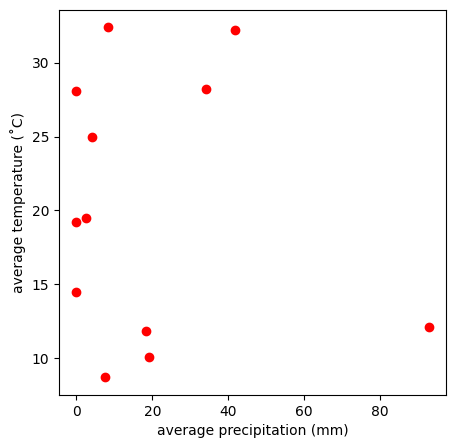

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
climate = pd.read_csv('https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/mesa_climate.csv')
climate = climate.set_index('month')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(climate['ppt'], climate['tavg'], color='r')

# set labels for subplot axes
ax.set_xlabel('average precipitation (mm)')
ax.set_ylabel('average temperature (˚C)')

9. Create another scatterplot using the same variables as above, but add a first order polynomial best fit line (trendline) to the graph. Make the scatterplot markers and trendline different colors and make sure your axes are labeled.

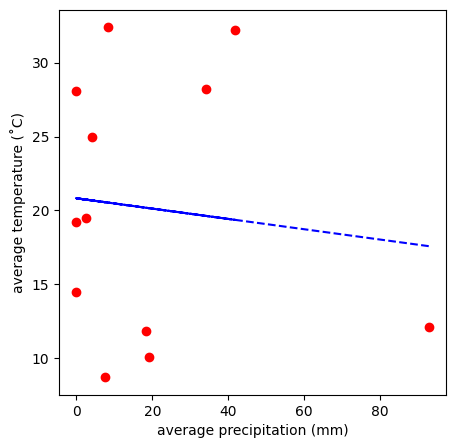

In [8]:
import numpy as np
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(climate['ppt'], climate['tavg'], color='r')

# set labels for subplot axes
ax.set_xlabel('average precipitation (mm)')
ax.set_ylabel('average temperature (˚C)')

# add a first order trend line
m, b = np.polyfit(climate['ppt'], climate['tavg'], 1)
ax.plot(climate['ppt'], m*climate['ppt'] + b, "b--")


10. Create a bar chart with the month abbreviation on the X axis and the average precipitation on the Y axis. Label your axes appropriately.

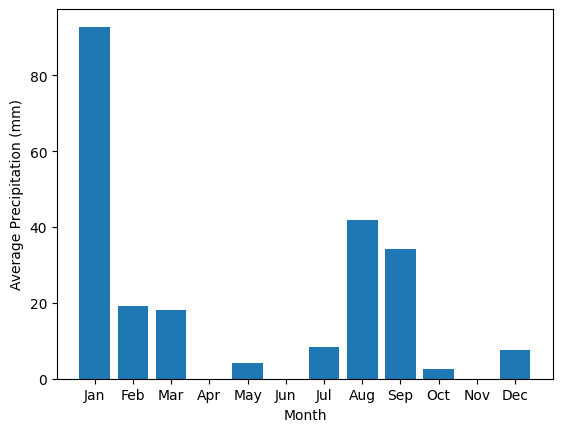

In [10]:
import matplotlib.pyplot as plt

# Extract the month abbreviations and average precipitation values
months = climate.index
precipitation = climate['ppt']

# Create the bar chart
plt.bar(months, precipitation)

# Set the labels for the x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')

# Show the plot
plt.show()
